In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from nltk.corpus import wordnet

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Setup

In [4]:
path_to_db='../ESC-50/'

# Load Dataset
Here we load the csv that describes each file in the dataset.

In [5]:
dataset = pd.read_csv(path_to_db + 'meta/esc50.csv')

In [6]:
dataset.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


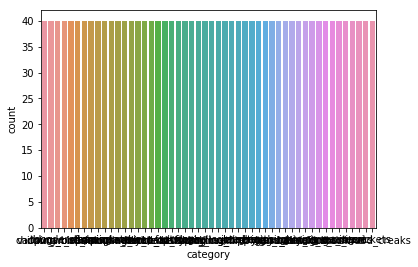

In [7]:
sns.countplot(dataset['category'])

In [11]:
common_set = {}
organism_synset = wordnet.synset('organism.n.01')
for category in dataset['category'].unique():
    temp = wordnet.synsets(category)
    if temp == []:
        continue
    res = temp[0].lowest_common_hypernyms(organism_synset)
    if res == []:
        continue
    elif res[0] == organism_synset:
        common_set[category] = res
    
print(common_set)

{'dog': [Synset('organism.n.01')], 'insects': [Synset('organism.n.01')], 'cat': [Synset('organism.n.01')], 'rooster': [Synset('organism.n.01')], 'crickets': [Synset('organism.n.01')], 'crow': [Synset('organism.n.01')], 'sheep': [Synset('organism.n.01')], 'cow': [Synset('organism.n.01')], 'pig': [Synset('organism.n.01')], 'hen': [Synset('organism.n.01')], 'frog': [Synset('organism.n.01')]}


In [10]:
for category in dataset['category'].unique():
    print(category)
    temp = wordnet.synsets(category)
    for synset in temp:
        print(synset.hypernyms())

dog
[Synset('canine.n.02'), Synset('domestic_animal.n.01')]
[Synset('unpleasant_woman.n.01')]
[Synset('chap.n.01')]
[Synset('villain.n.01')]
[Synset('sausage.n.01')]
[Synset('catch.n.06')]
[Synset('support.n.10')]
[Synset('pursue.v.02')]
chirping_birds
vacuum_cleaner
[Synset('home_appliance.n.01')]
thunderstorm
[Synset('storm.n.01')]
door_wood_knock
can_opening
crow
[Synset('corvine_bird.n.01')]
[Synset('cry.n.05')]
[Synset('sioux.n.01')]
[]
[Synset('boast.n.01')]
[Synset('siouan.n.02')]
[Synset('boast.v.01')]
[Synset('utter.v.02')]
[Synset('utter.v.02')]
clapping
[Synset('approval.n.04')]
[Synset('put.v.01')]
[Synset('beat.v.08')]
[Synset('gesticulate.v.01')]
[Synset('gesticulate.v.01')]
[Synset('beat.v.15')]
[Synset('hit.v.03')]
[Synset('hit.v.01')]
fireworks
[Synset('low_explosive.n.01')]
chainsaw
[Synset('power_saw.n.01')]
airplane
[Synset('heavier-than-air_craft.n.01')]
mouse_click
[Synset('depression.n.10')]
pouring_water
train
[Synset('public_transport.n.01')]
[Synset('series.n.

In [17]:
wordnet.synsets('knock')[0].hypernyms()[0].hypernyms()

[Synset('happening.n.01')]

In [36]:
print(pd.Series(common_set))

dog         [Synset('organism.n.01')]
crow        [Synset('organism.n.01')]
sheep       [Synset('organism.n.01')]
frog        [Synset('organism.n.01')]
cow         [Synset('organism.n.01')]
insects     [Synset('organism.n.01')]
hen         [Synset('organism.n.01')]
pig         [Synset('organism.n.01')]
rooster     [Synset('organism.n.01')]
cat         [Synset('organism.n.01')]
crickets    [Synset('organism.n.01')]
dtype: object


In [47]:
wordnet.synsets('bark')

[Synset('bark.n.01'),
 Synset('bark.n.02'),
 Synset('bark.n.03'),
 Synset('bark.n.04'),
 Synset('bark.v.01'),
 Synset('bark.v.02'),
 Synset('bark.v.03'),
 Synset('bark.v.04'),
 Synset('bark.v.05')]

In [ ]:
for category in dataset['category'].unique():
    temp = wordnet.synsets(category)
    if temp == []:
        continue
    res = temp[0].lowest_common_hypernyms(organism_synset)
    if res == []:
        continue
    elif res[0] == organism_synset:
        common_set[category] = res